In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import re
import os
import string
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression 

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

from nltk.stem.porter import * 
from nltk.corpus import *
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import VarianceThreshold


from sklearn.feature_selection import mutual_info_classif

from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn import decomposition
import matplotlib.pyplot as plt
import itertools
from sklearn.externals import joblib
from textblob import TextBlob

In [ ]:
def is_number(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
news_headlines = pd.read_csv("drive/My Drive/dataset.csv")
news = news_headlines.head(100000)

In [ ]:
#news.headline_category.unique() 

In [ ]:
#news_headlines.head()

In [ ]:
#print(news.iloc[[0]])

In [ ]:

news['category'] = ""
for i in range(100000):
  if(("sports" in news.headline_category[i] )or ("cricket" in news.headline_category[i]) or "football" in news.headline_category[i]):
    news.category[i] = "sports"
  elif("india" in news.headline_category[i]):
    news.category[i] = "national"
  elif("business" in news.headline_category[i]):
    news.category[i] = "business"
  elif("city" in news.headline_category[i] or "times" in news.headline_category[i]):
    news.category[i] = "local"
  elif("entertainment" in news.headline_category[i] or "bollywood" in news.headline_category[i] or "hollywood" in news.headline_category[i]):
    news.category[i] = "entertainment"
  else:
    news.category[i] = "miscellaneous"
news.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_n

,publish_date,headline_category,headline_text,category
0,20010101,sports.wwe,win over cena satisfying but defeating underta...,sports
1,20010102,bollywood,Raju Chacha,entertainment
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,miscellaneous
3,20010102,unknown,Fissures in Hurriyat over Pak visit,miscellaneous
4,20010102,unknown,America's unwanted heading for India?,miscellaneous


In [ ]:
#*********** filter out useless words,symbols

news_list = [s.lower().translate(str.maketrans('','',string.punctuation)) for s in news['headline_text']]
#converts all uppercase characters to lowercase.remove punctuation
stop = set(stopwords.words('english'))
"""
Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”)
that a search engine has been programmed to ignore, both when indexing entries
for searching and when retrieving them as the result of a search query.
"""
#print(stop)
filtered_words = []
for sentence in news_list:
	filtered_words.append(" ".join([word for word in sentence.split() if ((word.lower() not in stop) and (len(word.lower())<15) and not (is_number(word.lower()))) ])) #need to check which words are removed
#join() is a string method which returns a string concatenated with the elements of an iterable.

stemmer = PorterStemmer()
stemmed=[]
for words in filtered_words:
	st=''
	for i in words.split(' '):
		st=st+' '+stemmer.stem(i)

	stemmed.append(st)
"""
print(news_list[:5])
print(filtered_words[:5])
print(stemmed[:5])"""

'\nprint(news_list[:5])\nprint(filtered_words[:5])\nprint(stemmed[:5])'

In [ ]:
#Convert stemmed collection of text to a sparse matrix of token counts
vector = CountVectorizer()
x = vector.fit_transform(stemmed)

code = LabelEncoder()
y = code.fit_transform(news['category'])	# it takes the whole coloumn and then generates the required amount of labels

class_names = list(set(" ".join(news['category']).split(" ")))
print(class_names)

['business', 'sports', 'national', 'miscellaneous', 'entertainment', 'local']


In [ ]:

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

featurenames=' '.join(vector.get_feature_names())
#print(featurenames)
file = open("features.txt","w") 
file.write(featurenames)

file.close()



In [ ]:
#lr

# decision tree


In [ ]:
def train_using_gini(X_train, X_test, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [ ]:
# Function to perform training with entropy. 
def tarin_using_entropy(X_train, X_test, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 

In [ ]:
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
      
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
  

In [ ]:
clf_gini = train_using_gini(xtrain, xtest, ytrain) 
clf_entropy = tarin_using_entropy(xtrain, xtest, ytrain) 

In [ ]:
 # Prediction using gini 
 y_pred_gini = prediction(xtest, clf_gini) 
 cal_accuracy(ytest, y_pred_gini) 

Predicted values:
[2 2 4 ... 2 2 2]
Confusion Matrix:  [[    0     0    53     0     3     0]
 [    0     0   474     1     8     0]
 [    0     0 12127    30    93     0]
 [    0     0  3420    61   126     0]
 [    0     0  3063    60   272     0]
 [    0     0   185     1    23     0]]
Accuracy :  62.3
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.00      0.00      0.00       483
           2       0.63      0.99      0.77     12250
           3       0.40      0.02      0.03      3607
           4       0.52      0.08      0.14      3395
           5       0.00      0.00      0.00       209

    accuracy                           0.62     20000
   macro avg       0.26      0.18      0.16     20000
weighted avg       0.54      0.62      0.50     20000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Results Using Entropy:") 
    # Prediction using entropy 
y_pred_entropy = prediction(xtest, clf_entropy) 
cal_accuracy(ytest, y_pred_entropy)

Results Using Entropy:
Predicted values:
[2 2 4 ... 2 2 2]
Confusion Matrix:  [[    0     0    53     0     3     0]
 [    0     0   474     1     8     0]
 [    0     0 12127    30    93     0]
 [    0     0  3420    61   126     0]
 [    0     0  3063    60   272     0]
 [    0     0   185     1    23     0]]
Accuracy :  62.3
Report :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.00      0.00      0.00       483
           2       0.63      0.99      0.77     12250
           3       0.40      0.02      0.03      3607
           4       0.52      0.08      0.14      3395
           5       0.00      0.00      0.00       209

    accuracy                           0.62     20000
   macro avg       0.26      0.18      0.16     20000
weighted avg       0.54      0.62      0.50     20000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#naive bayes

Normal implementation
0.6916
Confusion matrix, without normalization
[[    0     0    20    11    25     0]
 [    0   152   213   102    16     0]
 [    0   110 10750   700   679    11]
 [    0    56  2013  1135   395     8]
 [    0     5  1392   227  1771     0]
 [    0     0    66   109    10    24]]
Normalized confusion matrix
[[0.   0.   0.36 0.2  0.45 0.  ]
 [0.   0.31 0.44 0.21 0.03 0.  ]
 [0.   0.01 0.88 0.06 0.06 0.  ]
 [0.   0.02 0.56 0.31 0.11 0.  ]
 [0.   0.   0.41 0.07 0.52 0.  ]
 [0.   0.   0.32 0.52 0.05 0.11]]


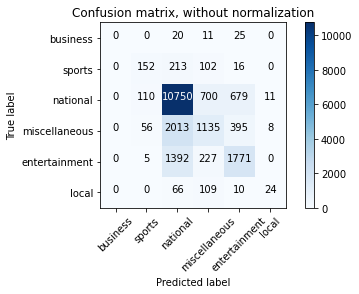

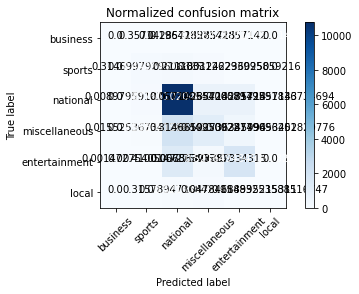

In [ ]:
nb = MultinomialNB()
nb.fit(xtrain, ytrain)
print("Normal implementation")
print(nb.score(xtest, ytest))		# to calculate the score for the classification
joblib.dump(nb, 'nb.pkl') 


ypred = nb.predict(xtest)
cnf_matrix = confusion_matrix(ytest, ypred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,title='Normalized confusion matrix')

plt.show()


#neural network

In [ ]:

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50, 2), random_state=1).fit(xtrain,ytrain)
print("NN without MI")
print(accuracy_score(ytest, NN.predict(xtest)))

NN without MI
0.6125


#SENTIMENT ANALYSIS


In [ ]:
def analyze_polarity(headline):
 
    result = TextBlob(headline)
    if result.sentiment.polarity > 0:
        return 1
    elif result.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
news['Result'] = np.array([analyze_polarity(headline) for headline in news['headline_text']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
positive_headlines = [ head for index, head in enumerate(news['headline_text']) if news['Result'][index] > 0]

unbiased_headlines = [ head for index, head in enumerate(news['headline_text']) if news['Result'][index] == 0]

negative_headlines = [ head for index, head in enumerate(news['headline_text']) if news['Result'][index] < 0]

In [ ]:
o_pos = len(positive_headlines)*100/len(news['headline_text'])

o_neg = len(negative_headlines)*100/len(news['headline_text'])

o_un = len(unbiased_headlines)*100/len(news['headline_text'])

In [ ]:
print('Positive Headlines: ' + str(o_pos) + '\nNegative Headlines: ' + str(o_neg) + '\nUnbiased Headlines: ' + str(o_un))


Positive Headlines: 14.686
Negative Headlines: 10.336
Unbiased Headlines: 74.978


In [ ]:
def sentiment_category_wise(headline_name):
    #Returns a dataset that contains data relevant to the given party name
    return news[news['headline_text'].str.contains(headline_name)]

In [ ]:
frames_sports = [sentiment_category_wise('sports'), sentiment_category_wise('cricket')]
data_sports = pd.concat(frames_sports)

frames_india = [sentiment_category_wise('india')]
data_india = pd.concat(frames_india)

frames_business = [sentiment_category_wise('business')]
data_business = pd.concat(frames_business)

frames_city = [sentiment_category_wise('city')]
data_city = pd.concat(frames_city)

frames_entertainment = [sentiment_category_wise('entertainment')]
data_entertainment = pd.concat(frames_entertainment)


frames_miscellaneous = [sentiment_category_wise('miscellaneous')]
data_miscellaneous = pd.concat(frames_miscellaneous)

In [ ]:
def result_ratio(dataset):
    """
    Returns the ratio of positive sentiment with negative sentiment of all the relevant reported headlines
    
    The given dataset is run through and 3 groups are created: 
    (1) - Positive Sentiment
    (0) - Unbiased Sentiment
    (-1) - Negative Sentiment
    The ratio of the number of the reports with a positive sentiment with number of reports with a negative
    sentiment is then returned.
    
    Parameter dataset: The dataset to segregate on the basis of sentiments
    Precondition: Dataset with column 'Result' that may only contain '1', '0' or '-1' values based on the
    aforementioned criteria
    """
    grouped_data = dataset.groupby(['Result'])['headline_text'].count()
    return grouped_data[1]/grouped_data[-1]

In [ ]:
print('n1. ' + str(result_ratio(data_sports)) + '\n2. ' + str(result_ratio(data_india)) + '\n3. ' + str(result_ratio(data_business))  + '\n4. ' + str(result_ratio(data_city)) + '\n5. ' + str(result_ratio(data_entertainment)))
#print( str(result_ratio(data_miscellaneous))) 

n1. 0.9487179487179487
2. 1.0
3. 0.8
4. 2.0952380952380953
5. 5.0


In [ ]:
print('1. ' + str(len(data_sports)) + '\n2. ' + str(len(data_india)) + '\n3. ' + str(len(data_business)) + '\n4. ' + str(len(data_city)) + '\n5. ' + str(len(data_entertainment)))

1. 293
2. 63
3. 255
4. 1048
5. 32


# Political Parties

In [ ]:
data = news
def party_data(party_name):
    return data[data['headline_text'].str.contains(party_name)]

frames_bjp = [party_data('bjp'), party_data('BJP')]
data_bjp = pd.concat(frames_bjp)

frames_congress = [party_data('congress'), party_data('Congress')]
data_congress = pd.concat(frames_congress)

frames_bsp = [party_data('bsp'), party_data('BSP')]
data_bsp = pd.concat(frames_bsp)

frames_aap = [party_data('aap'), party_data('AAP')]
data_aap = pd.concat(frames_aap)



In [ ]:
def result_ratio(dataset):
    
    grouped_data = dataset.groupby(['Result'])['headline_text'].count()
    return grouped_data[1]/grouped_data[-1]

In [ ]:
print('1. ' + str(result_ratio(data_bjp)) + '\n2. ' + str(result_ratio(data_congress)) + '\n3. ' + str(result_ratio(data_bsp)))

1. 0.9741935483870968
2. 1.2592592592592593
3. 1.3846153846153846


In [ ]:
print('1. ' + str(result_ratio(data_aap)))

1. 4.0


In [ ]:
print('1. ' + str(len(data_bjp)) + '\n2. ' + str(len(data_congress)) + '\n3. ' + str(len(data_bsp)))

1. 1761
2. 598
3. 139


In [ ]:
print('1. ' + str(len(data_aap)))

1. 14
